In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import matplotlib.pyplot as plt


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
batchsize=8

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 62793 images belonging to 2 classes.
Found 15697 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_data = test_datagen.flow_from_directory(r'C:\Users\exact\OneDrive\Desktop\minor project\Prepared Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 6408 images belonging to 2 classes.


In [6]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [10]:
# Keep track of the training loss and accuracy
losses = []
accuracies = []

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=30)

Epoch 1/30
7849/7849 [==============================] - ETA: 0s - loss: 0.2090 - accuracy: 0.9164
Epoch 1: val_loss improved from inf to 0.20286, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 683s 86ms/step - loss: 0.2090 - accuracy: 0.9164 - val_loss: 0.2029 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 2/30
7849/7849 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.9290
Epoch 2: val_loss did not improve from 0.20286
7849/7849 [==============================] - 748s 95ms/step - loss: 0.1815 - accuracy: 0.9290 - val_loss: 0.2292 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 3/30
7849/7849 [==============================] - ETA: 0s - loss: 0.1734 - accuracy: 0.9333
Epoch 3: val_loss improved from 0.20286 to 0.17815, saving model to C:\Users\exact\OneDrive\Desktop\minor project\models


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


INFO:tensorflow:Assets written to: C:\Users\exact\OneDrive\Desktop\minor project\models\assets


7849/7849 [==============================] - 803s 102ms/step - loss: 0.1734 - accuracy: 0.9333 - val_loss: 0.1782 - val_accuracy: 0.9290 - lr: 0.0010
Epoch 4/30
7849/7849 [==============================] - ETA: 0s - loss: 0.1657 - accuracy: 0.9366
Epoch 4: val_loss did not improve from 0.17815
7849/7849 [==============================] - 767s 98ms/step - loss: 0.1657 - accuracy: 0.9366 - val_loss: 0.1832 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 5/30
7849/7849 [==============================] - ETA: 0s - loss: 0.1607 - accuracy: 0.9369
Epoch 5: val_loss did not improve from 0.17815
7849/7849 [==============================] - 808s 103ms/step - loss: 0.1607 - accuracy: 0.9369 - val_loss: 0.1863 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 6/30
7849/7849 [==============================] - ETA: 0s - loss: 0.1624 - accuracy: 0.9379
Epoch 6: val_loss did not improve from 0.17815

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
7849/7849 [===========================

In [12]:
from keras.models import load_model
import numpy as np
model.save("minorcnnfinalmodel.h5")
np.save('my_history.npy',history.history)

In [14]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7850/7850 [==============================] - 579s 74ms/step - loss: 0.1498 - accuracy: 0.9428
0.14978624880313873
0.9428120851516724


In [15]:
import keras
loaded_model = keras.models.load_model("minorcnnfinalmodel.h5")

In [16]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [17]:
acc_tr, loss_tr = loaded_model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7850/7850 [==============================] - 592s 75ms/step - loss: 0.1525 - accuracy: 0.9427
0.1524541825056076
0.9427006244659424


In [18]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

1963/1963 [==============================] - 142s 73ms/step - loss: 0.1781 - accuracy: 0.9281
0.17812825739383698
0.9281391501426697


In [19]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

801/801 [==============================] - 57s 71ms/step - loss: 0.4571 - accuracy: 0.8700
0.1524541825056076
0.9427006244659424


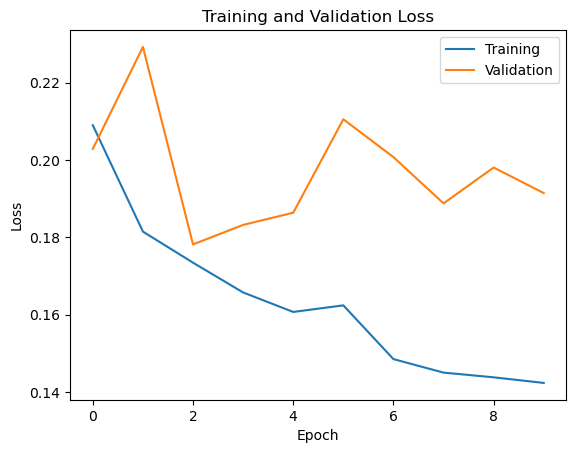

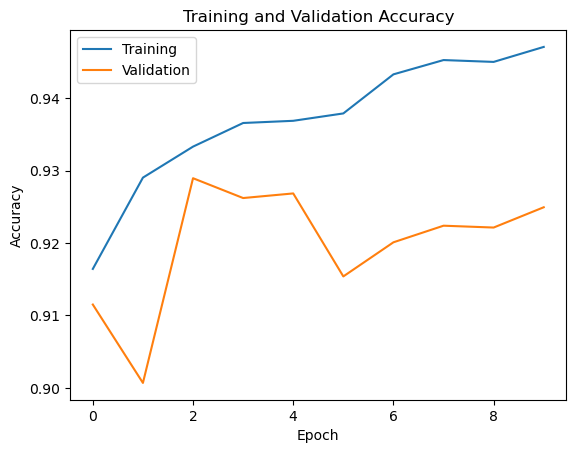

In [20]:
# Plot the training loss and accuracy
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.show()

In [21]:
myhistory=np.load('my_history.npy', allow_pickle='TRUE').item()

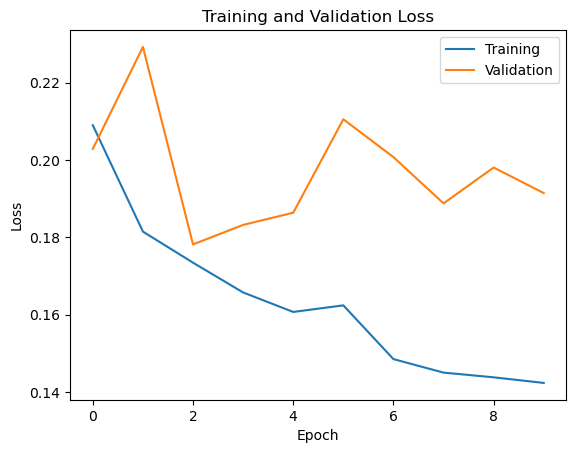

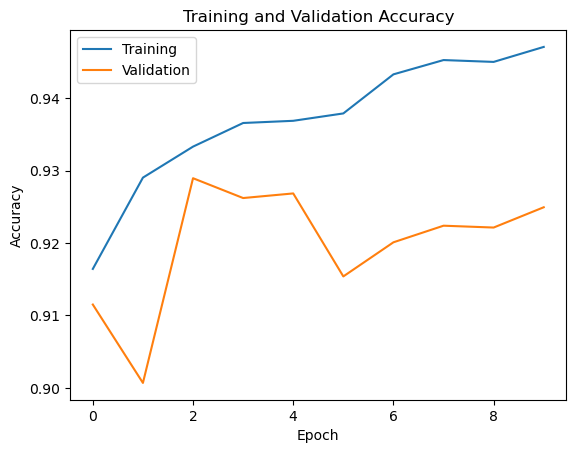

In [22]:
# Plot the training loss and accuracy
plt.figure(1)
plt.plot(myhistory['loss'])
plt.plot(myhistory['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.figure(2)
plt.plot(myhistory['accuracy'])
plt.plot(myhistory['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])


plt.show()